In [1]:
%pip install --upgrade pip
%pip uninstall -y pandas
%pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/10.7 MB ? eta -:--:--Downloading pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl (10.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 5.4 MB/s  0:00:01m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 5.4 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 5.2 MB/s  0:00:00 eta 0:00:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd


In [13]:
df = pd.read_csv("../dataset/cost-of-living.csv")  
print(df.shape)
print(df.iloc[:, 0])  # First column
df.head()

(55, 161)
0                          Meal, Inexpensive Restaurant
1     Meal for 2 People, Mid-range Restaurant, Three...
2        McMeal at McDonalds (or Equivalent Combo Meal)
3                     Domestic Beer (0.5 liter draught)
4                     Imported Beer (0.33 liter bottle)
5                        Coke/Pepsi (0.33 liter bottle)
6                            Water (0.33 liter bottle) 
7                             Milk (regular), (1 liter)
8                      Loaf of Fresh White Bread (500g)
9                                   Eggs (regular) (12)
10                                   Local Cheese (1kg)
11                             Water (1.5 liter bottle)
12                           Bottle of Wine (Mid-Range)
13                     Domestic Beer (0.5 liter bottle)
14                    Imported Beer (0.33 liter bottle)
15                        Cigarettes 20 Pack (Marlboro)
16                     One-way Ticket (Local Transport)
17          Chicken Breasts (Boneless,

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.0,3.38,3.58,5.27,...,3.75,5.72,3.82,15.0,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.0,17.48,22.99,23.73,...,18.76,22.01,11.47,60.0,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.0,4.51,3.58,4.22,...,3.56,3.67,3.06,8.2,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.0,1.69,1.02,0.84,...,1.50,1.10,2.37,4.0,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.0,2.82,1.53,2.11,...,1.50,2.20,3.06,4.0,7.26,5.57,5.59,4.97,2.81,2.70


In [14]:
df = df.copy()

# Rename first column to "item"
df.rename(columns={"Unnamed: 0": "item"}, inplace=True)

# Set item as index (rows = items)
df.set_index("item", inplace=True)

print(df.index[:5])   # item names
print(df.columns[:5]) # city names


Index(['Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)'],
      dtype='object', name='item')
Index(['Saint Petersburg, Russia', 'Istanbul, Turkey', 'Izmir, Turkey',
       'Helsinki, Finland', 'Chisinau, Moldova'],
      dtype='object')


In [9]:
# Transpose: now rows = cities, columns = items
city_df = df.T

city_df.index.name = "City"
print(city_df.shape)      # ~ (161, 55)
print(city_df.columns[:5])  # the item names as features
city_df.head()


(160, 55)
Index(['Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)'],
      dtype='object', name='item')


item,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
City,,,,,,,,,,,,,,,,,,,,,
"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.30,0.80,1.91,0.62,9.73,20874.72,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.70,1.78,0.58,8.61,20898.83,212.18,4948.41
"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,2.02,...,2.30,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.60,1641.00
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.30


In [15]:
city_df.isna().sum()

item
Meal, Inexpensive Restaurant                                                  0
Meal for 2 People, Mid-range Restaurant, Three-course                         0
McMeal at McDonalds (or Equivalent Combo Meal)                                0
Domestic Beer (0.5 liter draught)                                             0
Imported Beer (0.33 liter bottle)                                             0
Coke/Pepsi (0.33 liter bottle)                                                0
Water (0.33 liter bottle)                                                     0
Milk (regular), (1 liter)                                                     0
Loaf of Fresh White Bread (500g)                                              0
Eggs (regular) (12)                                                           0
Local Cheese (1kg)                                                            0
Water (1.5 liter bottle)                                                      0
Bottle of Wine (Mid-Range)         

In [16]:
# Target: typical cost across all items
city_df["median"] = city_df.median(axis=1)


In [17]:
city_df.head()

item,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",cost_of_living_score,median
City,,,,,,,,,,,,,,,,,,,,,
"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,1.18,...,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86,4.40,4.40
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,1.30,0.80,1.91,0.62,9.73,20874.72,282.94,6905.43,3.82,3.82
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,1.31,0.70,1.78,0.58,8.61,20898.83,212.18,4948.41,3.06,3.06
"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,2.02,...,2.13,2.91,1.61,1.25,12.34,24402.77,351.60,1641.00,8.00,8.00
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,...,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.30,3.61,3.61


In [23]:
city_df.columns

Index(['meal_inexpensive', 'meal_midrange_2p', 'mcmeal', 'beer_domestic',
       'beer_imported_bottle', 'soda', 'Water (0.33 liter bottle) ', 'milk',
       'bread', 'eggs', 'cheese', 'water_large', 'wine',
       'beer_domestic_bottle', 'beer_imported_bottle', 'cigarettes',
       'ticket_oneway', 'chicken', 'monthly_pass', 'gasoline',
       'volkswagen_golf', 'apt1_centre', 'apt1_outside', 'apt3_centre',
       'apt3_outside',
       'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
       '1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)',
       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
       'fitness_club', 'tennis_court', 'cinema', 'jeans', 'summer_dress',
       'nike_shoes', 'leather_shoes', 'sqm_buy_centre', 'sqm_buy_outside',
       'salary',
       'Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate',
       'taxi_start', 'taxi_1km', 'taxi_wait', 'apples', 'oranges', 'potatoes',
       'lettuce

In [18]:
rename_map = {
    "Meal, Inexpensive Restaurant": "meal_inexpensive",
    "Meal for 2 People, Mid-range Restaurant, Three-course": "meal_midrange_2p",
    "McMeal at McDonalds (or Equivalent Combo Meal)": "mcmeal",
    "Domestic Beer (0.5 liter draught)": "beer_domestic",
    "Imported Beer (0.33 liter bottle)": "beer_imported",
    "Coke/Pepsi (0.33 liter bottle)": "soda",
    "Water (0.33 liter bottle)": "water_small",
    "Milk (regular), (1 liter)": "milk",
    "Loaf of Fresh White Bread (500g)": "bread",
    "Eggs (regular) (12)": "eggs",
    "Local Cheese (1kg)": "cheese",
    "Water (1.5 liter bottle)": "water_large",
    "Bottle of Wine (Mid-Range)": "wine",
    "Domestic Beer (0.5 liter bottle)": "beer_domestic_bottle",
    "Imported Beer (0.33 liter bottle)": "beer_imported_bottle",
    "Cigarettes 20 Pack (Marlboro)": "cigarettes",

    "One-way Ticket (Local Transport)": "ticket_oneway",
    "Monthly Pass (Regular Price)": "monthly_pass",
    "Gasoline (1 liter)": "gasoline",

    "Taxi Start (Normal Tariff)": "taxi_start",
    "Taxi 1km (Normal Tariff)": "taxi_1km",
    "Taxi 1hour Waiting (Normal Tariff)": "taxi_wait",

    "Volkswagen Golf": "volkswagen_golf",
    "Toyota Corolla 1.6l 97kW Comfort": "toyota_corolla",

    "Apartment (1 bedroom) in City Centre": "apt1_centre",
    "Apartment (1 bedroom) Outside of Centre": "apt1_outside",
    "Apartment (3 bedrooms) in City Centre": "apt3_centre",
    "Apartment (3 bedrooms) Outside of Centre": "apt3_outside",

    "Basic (Electricity, Heating, Cooling, Water, Garbage)": "utilities_basic",
    "Price per Square Meter to Buy Apartment in City Centre": "sqm_buy_centre",
    "Price per Square Meter to Buy Apartment Outside of Centre": "sqm_buy_outside",

    "Preschool (or Kindergarten), Full Day, Private": "preschool",
    "International Primary School, Yearly for 1 Child": "intl_primary_school",

    "Average Monthly Net Salary (After Tax)": "salary",
    "Mortgage Interest Rate in Percentages (%), Yearly": "mortgage_rate",

    "1 Pair of Jeans (Levis 501 Or Similar)": "jeans",
    "1 Summer Dress in a Chain Store (Zara, H&M, ...)": "summer_dress",
    "1 Pair of Nike Running Shoes (Mid-Range)": "nike_shoes",
    "1 Pair of Men Leather Business Shoes": "leather_shoes",

    "Fitness Club, Monthly Fee for 1 Adult": "fitness_club",
    "Tennis Court Rent (1 Hour on Weekend)": "tennis_court",
    "Cinema, International Release, 1 Seat": "cinema",

    "Apples (1kg)": "apples",
    "Oranges (1kg)": "oranges",
    "Potato (1kg)": "potatoes",
    "Lettuce (1 head)": "lettuce",
    "Cappuccino (regular)": "cappuccino",
    "Rice (white), (1kg)": "rice",
    "Tomato (1kg)": "tomatoes",
    "Banana (1kg)": "bananas",
    "Onion (1kg)": "onions",
    "Chicken Breasts (Boneless, Skinless), (1kg)": "chicken",
    "Beef Round (1kg) (or Equivalent Back Leg Red Meat)": "beef"
}


In [26]:
city_df.rename(columns=rename_map, inplace=True)

In [27]:
city_df.columns

Index(['meal_inexpensive', 'meal_midrange_2p', 'mcmeal', 'beer_domestic',
       'beer_imported_bottle', 'soda', 'Water (0.33 liter bottle) ', 'milk',
       'bread', 'eggs', 'cheese', 'water_large', 'wine',
       'beer_domestic_bottle', 'beer_imported_bottle', 'cigarettes',
       'ticket_oneway', 'chicken', 'monthly_pass', 'gasoline',
       'volkswagen_golf', 'apt1_centre', 'apt1_outside', 'apt3_centre',
       'apt3_outside',
       'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
       '1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)',
       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
       'fitness_club', 'tennis_court', 'cinema', 'jeans', 'summer_dress',
       'nike_shoes', 'leather_shoes', 'sqm_buy_centre', 'sqm_buy_outside',
       'salary',
       'Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate',
       'taxi_start', 'taxi_1km', 'taxi_wait', 'apples', 'oranges', 'potatoes',
       'lettuce

In [28]:
rename= {
    "Water (0.33 liter bottle)": "water",
    "Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car)": "car_price",
    "Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child": "pre_school",
    "intl_primary_school": "avg_primary_school",
    "Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment": "utilities",
    "1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)": "mobile_minute",
    "Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)": "avg_internet",
    "Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate": "interest_rate",
    





}

In [29]:
city_df.rename(columns=rename, inplace=True)

In [30]:
city_df.columns

Index(['meal_inexpensive', 'meal_midrange_2p', 'mcmeal', 'beer_domestic',
       'beer_imported_bottle', 'soda', 'Water (0.33 liter bottle) ', 'milk',
       'bread', 'eggs', 'cheese', 'water_large', 'wine',
       'beer_domestic_bottle', 'beer_imported_bottle', 'cigarettes',
       'ticket_oneway', 'chicken', 'monthly_pass', 'gasoline',
       'volkswagen_golf', 'apt1_centre', 'apt1_outside', 'apt3_centre',
       'apt3_outside', 'utilities', 'mobile_minute', 'avg_internet',
       'fitness_club', 'tennis_court', 'cinema', 'jeans', 'summer_dress',
       'nike_shoes', 'leather_shoes', 'sqm_buy_centre', 'sqm_buy_outside',
       'salary', 'interest_rate', 'taxi_start', 'taxi_1km', 'taxi_wait',
       'apples', 'oranges', 'potatoes', 'lettuce', 'cappuccino', 'rice',
       'tomatoes', 'bananas', 'onions', 'beef', 'car_price', 'pre_school',
       'avg_primary_school', 'cost_of_living_score', 'median'],
      dtype='object', name='item')

In [31]:
city_df.rename(columns={"Water (0.33 liter bottle) ": "water"}, inplace=True)

In [32]:
city_df.columns

Index(['meal_inexpensive', 'meal_midrange_2p', 'mcmeal', 'beer_domestic',
       'beer_imported_bottle', 'soda', 'water', 'milk', 'bread', 'eggs',
       'cheese', 'water_large', 'wine', 'beer_domestic_bottle',
       'beer_imported_bottle', 'cigarettes', 'ticket_oneway', 'chicken',
       'monthly_pass', 'gasoline', 'volkswagen_golf', 'apt1_centre',
       'apt1_outside', 'apt3_centre', 'apt3_outside', 'utilities',
       'mobile_minute', 'avg_internet', 'fitness_club', 'tennis_court',
       'cinema', 'jeans', 'summer_dress', 'nike_shoes', 'leather_shoes',
       'sqm_buy_centre', 'sqm_buy_outside', 'salary', 'interest_rate',
       'taxi_start', 'taxi_1km', 'taxi_wait', 'apples', 'oranges', 'potatoes',
       'lettuce', 'cappuccino', 'rice', 'tomatoes', 'bananas', 'onions',
       'beef', 'car_price', 'pre_school', 'avg_primary_school',
       'cost_of_living_score', 'median'],
      dtype='object', name='item')

In [33]:
city_df.drop(columns=["cost_of_living_score"], inplace=True)

In [34]:
city_df.columns

Index(['meal_inexpensive', 'meal_midrange_2p', 'mcmeal', 'beer_domestic',
       'beer_imported_bottle', 'soda', 'water', 'milk', 'bread', 'eggs',
       'cheese', 'water_large', 'wine', 'beer_domestic_bottle',
       'beer_imported_bottle', 'cigarettes', 'ticket_oneway', 'chicken',
       'monthly_pass', 'gasoline', 'volkswagen_golf', 'apt1_centre',
       'apt1_outside', 'apt3_centre', 'apt3_outside', 'utilities',
       'mobile_minute', 'avg_internet', 'fitness_club', 'tennis_court',
       'cinema', 'jeans', 'summer_dress', 'nike_shoes', 'leather_shoes',
       'sqm_buy_centre', 'sqm_buy_outside', 'salary', 'interest_rate',
       'taxi_start', 'taxi_1km', 'taxi_wait', 'apples', 'oranges', 'potatoes',
       'lettuce', 'cappuccino', 'rice', 'tomatoes', 'bananas', 'onions',
       'beef', 'car_price', 'pre_school', 'avg_primary_school', 'median'],
      dtype='object', name='item')

In [35]:
city_df.to_csv("../dataset/cost-of-living-processed.csv")

In [36]:
# Overview
city_df.info()

# Summary stats
city_df.describe()

# Missing values per column
city_df.isna().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Saint Petersburg, Russia to Quito, Ecuador
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   meal_inexpensive      160 non-null    float64
 1   meal_midrange_2p      160 non-null    float64
 2   mcmeal                160 non-null    float64
 3   beer_domestic         160 non-null    float64
 4   beer_imported_bottle  160 non-null    float64
 5   soda                  160 non-null    float64
 6   water                 160 non-null    float64
 7   milk                  160 non-null    float64
 8   bread                 160 non-null    float64
 9   eggs                  160 non-null    float64
 10  cheese                160 non-null    float64
 11  water_large           160 non-null    float64
 12  wine                  160 non-null    float64
 13  beer_domestic_bottle  160 non-null    float64
 14  beer_imported_bottle  160 non-null    float64

item
meal_inexpensive        0
meal_midrange_2p        0
cinema                  0
jeans                   0
summer_dress            0
nike_shoes              0
leather_shoes           0
sqm_buy_centre          0
sqm_buy_outside         0
salary                  0
interest_rate           0
taxi_start              0
taxi_1km                0
taxi_wait               0
apples                  0
oranges                 0
potatoes                0
lettuce                 0
cappuccino              0
rice                    0
tomatoes                0
bananas                 0
onions                  0
beef                    0
car_price               0
pre_school              0
avg_primary_school      0
tennis_court            0
fitness_club            0
avg_internet            0
beer_domestic_bottle    0
mcmeal                  0
beer_domestic           0
beer_imported_bottle    0
soda                    0
water                   0
milk                    0
bread                   0
eggs   

In [38]:
%pip install numpy pandas matplotlib scikit-learn seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/8.1 MB ? eta -:--:--Downloading matplotlib-3.10.7-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 4.5 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 4.5 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/8.6 MB ? eta -:--:--Downloading scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl (8.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 5.2 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 5.2 MB/s  0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [40]:
sns.set(style="whitegrid")

In [41]:
print(city_df.shape)

(160, 56)


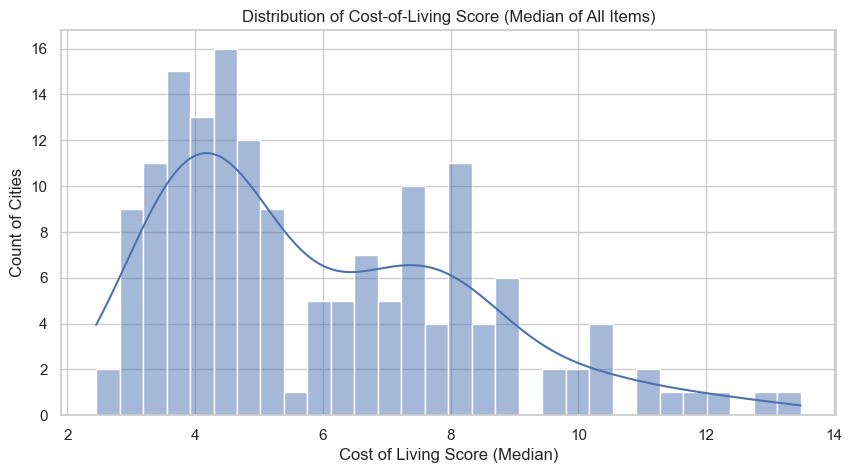

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(city_df["median"], kde=True, bins=30) # kde = kernel density estimate, it smooths the histogram
plt.title("Distribution of Cost-of-Living Score (Median of All Items)")
plt.xlabel("Cost of Living Score (Median)")
plt.ylabel("Count of Cities")
plt.show()

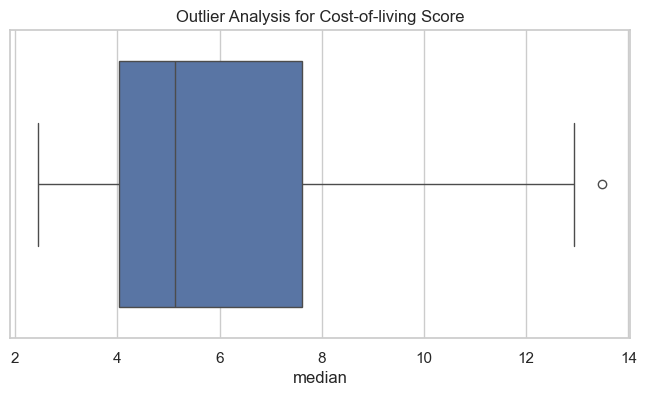

In [45]:
# Boxplot for outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=city_df["median"])
plt.title("Outlier Analysis for Cost-of-living Score")
plt.show()

In [48]:
city_df["median"]

City
Saint Petersburg, Russia    4.40
Istanbul, Turkey            3.82
Izmir, Turkey               3.06
Helsinki, Finland           8.00
Chisinau, Moldova           3.61
                            ... 
Melbourne, Australia        7.12
Perth, Australia            7.32
Sydney, Australia           7.68
Alexandria, Egypt           3.38
Quito, Ecuador              5.39
Name: median, Length: 160, dtype: float64

In [46]:
city_df["median"] = city_df.median(axis=1)


In [47]:
city_df["median"]

City
Saint Petersburg, Russia    4.40
Istanbul, Turkey            3.82
Izmir, Turkey               3.06
Helsinki, Finland           8.00
Chisinau, Moldova           3.61
                            ... 
Melbourne, Australia        7.12
Perth, Australia            7.32
Sydney, Australia           7.68
Alexandria, Egypt           3.38
Quito, Ecuador              5.39
Name: median, Length: 160, dtype: float64

In [50]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(city_df.drop(columns=["median"]))


In [51]:
X = city_df.drop(columns=["median"])
y = city_df["median"]
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

### Training

In [52]:
# ============================================================
# 1. IMPORTS
# ============================================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# ============================================================
# 2. LOAD DATA
# ============================================================
df = pd.read_csv("../dataset/cost-of-living-processed.csv", index_col=0)

print("Shape:", df.shape)
df.head()


Shape: (160, 56)


,meal_inexpensive,meal_midrange_2p,mcmeal,beer_domestic,beer_imported_bottle,soda,water,milk,bread,eggs,...,cappuccino,rice,tomatoes,bananas,onions,beef,car_price,pre_school,avg_primary_school,median
City,,,,,,,,,,,,,,,,,,,,,
"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,1.18,...,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86,4.40
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,1.84,1.30,0.80,1.91,0.62,9.73,20874.72,282.94,6905.43,3.82
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,1.56,1.31,0.70,1.78,0.58,8.61,20898.83,212.18,4948.41,3.06
"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,2.02,...,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.60,1641.00,8.00
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,...,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.30,3.61


In [53]:
X = df.drop(columns=["median"])
y = df["median"]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [55]:
scaler = RobustScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [56]:
rf = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    max_depth=None
)

rf.fit(X_train_scaled, y_train)


,n_estimators,400
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
y_pred = rf.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 0.481
RMSE: 0.724


### Feature Importance

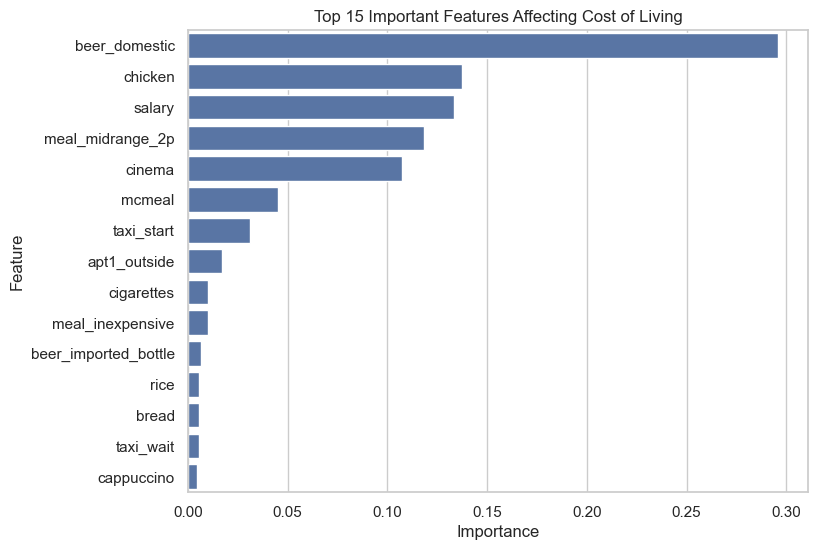

In [58]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Important Features Affecting Cost of Living")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [62]:
sample_city = X.iloc[0]
sample_scaled = scaler.transform([sample_city])

predicted_score = rf.predict(sample_scaled)[0]

print("City:", df.index[0])
print("Predicted Cost-of-Living Score:", predicted_score)

print("Actual Score:", y.iloc[0])

City: Saint Petersburg, Russia
Predicted Cost-of-Living Score: 4.490700000000019
Actual Score: 4.4


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [61]:
sample_city = X.iloc[12]
sample_scaled = scaler.transform([sample_city])

predicted_score = rf.predict(sample_scaled)[0]

print("City:", df.index[12])
print("Predicted Cost-of-Living Score:", predicted_score)
print("Actual Score:", y.iloc[12])

City: Ho Chi Minh City, Vietnam
Predicted Cost-of-Living Score: 3.4701249999999884
Actual Score: 2.45


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [64]:
sample_city = X.iloc[18]
sample_scaled = scaler.transform([sample_city])

predicted_score = rf.predict(sample_scaled)[0]

print("City:", df.index[18])
print("Predicted Cost-of-Living Score:", predicted_score)
print("Actual Score:", y.iloc[18])

City: Kharkiv, Ukraine
Predicted Cost-of-Living Score: 3.594224999999994
Actual Score: 3.75


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [67]:
new_york = city_df.loc[city_df.index.str.contains("New York")]

In [71]:
matches = [idx for idx in X.index if "New York" in idx]

matches


['New York, NY, United States']

In [72]:
city_name = matches[0]

sample_city = X.loc[city_name]
sample_scaled = scaler.transform([sample_city])

predicted_score = rf.predict(sample_scaled)[0]

print("City:", city_name)
print("Predicted:", predicted_score)
print("Actual:", y.loc[city_name])


City: New York, NY, United States
Predicted: 11.037749999999985
Actual: 13.48


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [77]:
matches = [idx for idx in X.index if "San Diego, CA, United States" in idx]

matches


['San Diego, CA, United States']

In [78]:
city_name = matches[0]

sample_city = X.loc[city_name]
sample_scaled = scaler.transform([sample_city])

predicted_score = rf.predict(sample_scaled)[0]

print("City:", city_name)
print("Predicted:", predicted_score)
print("Actual:", y.loc[city_name])

City: San Diego, CA, United States
Predicted: 8.214325000000036
Actual: 8.4


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [81]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# ------------------------------
# 1. Load data
# ------------------------------
df = pd.read_csv("../dataset/cost-of-living-processed.csv", index_col=0)

X = df.drop(columns=["median"])
y_reg = df["median"]

# ------------------------------
# 2. Convert regression → classification
# ------------------------------
def categorize(x):
    if x < 5:
        return 0          # low cost
    elif x < 8:
        return 1          # medium cost
    else:
        return 2          # high cost

y = y_reg.apply(categorize)

# ------------------------------
# 3. Train/test split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 4. Robust Scaling
# ------------------------------
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------
# 5. RandomForest CLASSIFIER
# ------------------------------
clf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    class_weight="balanced"
)

clf.fit(X_train_scaled, y_train)

# ------------------------------
# 6. Predictions
# ------------------------------
y_pred = clf.predict(X_test_scaled)

# ------------------------------
# 7. Classification Report
# ------------------------------
print(classification_report(y_test, y_pred,
                            target_names=["Low Cost", "Medium Cost", "High Cost"]))


              precision    recall  f1-score   support

    Low Cost       0.89      1.00      0.94        16
 Medium Cost       0.89      0.80      0.84        10
   High Cost       1.00      0.83      0.91         6

    accuracy                           0.91        32
   macro avg       0.93      0.88      0.90        32
weighted avg       0.91      0.91      0.90        32



In [82]:
import pickle

# Save model
with open("rf_median_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save scaler
with open("robust_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Saved rf_median_model.pkl and robust_scaler.pkl")


Saved rf_median_model.pkl and robust_scaler.pkl


In [83]:
import json
with open("rf_feature_names.json", "w") as f:
    json.dump(list(X.columns), f)


In [85]:
# -----------------------
# CATEGORY DEFINITIONS
# -----------------------

food = [
    "meal_inexpensive", "meal_midrange_2p", "mcmeal",
    "bread", "eggs", "cheese", "milk",
    "water", "water_large", "apples", "oranges", "potatoes",
    "lettuce", "cappuccino", "rice", "tomatoes", "bananas", "onions",
    "chicken", "beef"
]

restaurants = [
    "meal_inexpensive", "meal_midrange_2p", "mcmeal",
    "beer_domestic", "beer_imported_bottle", "wine", "soda"
]

housing = [
    "apt1_centre", "apt1_outside",
    "apt3_centre", "apt3_outside",
    "sqm_buy_centre", "sqm_buy_outside",
    "utilities"
]

transport = [
    "ticket_oneway", "monthly_pass",
    "gasoline", "taxi_start", "taxi_1km", "taxi_wait"
]

internet_utils = ["avg_internet", "utilities"]

lifestyle = [
    "jeans", "summer_dress", "nike_shoes", "leather_shoes",
    "cinema", "fitness_club", "tennis_court"
]


In [86]:
city_df["food_avg"] = city_df[food].mean(axis=1)
city_df["restaurants_avg"] = city_df[restaurants].mean(axis=1)
city_df["housing_avg"] = city_df[housing].mean(axis=1)
city_df["transport_avg"] = city_df[transport].mean(axis=1)
city_df["internet_utils_avg"] = city_df[internet_utils].mean(axis=1)
city_df["lifestyle_avg"] = city_df[lifestyle].mean(axis=1)


In [92]:
city_df["weighted_score"] = (
    city_df["housing_avg"] * 0.20 +
    city_df["food_avg"] * 0.20 +
    city_df["restaurants_avg"] * 0.10 +
    city_df["transport_avg"] * 0.10 +
    city_df["internet_utils_avg"] * 0.10 +
    city_df["lifestyle_avg"] * 0.10
)


In [93]:
# New X and y
X2 = city_df.drop(columns=["median", "weighted_score"])
y2 = city_df["weighted_score"]

# Train/test split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

# Robust scaling
scaler2 = RobustScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

# New model
rf_weighted = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)

rf_weighted.fit(X2_train_scaled, y2_train)

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
y2_pred = rf_weighted.predict(X2_test_scaled)

print("Weighted Model MAE:", mean_absolute_error(y2_test, y2_pred))
print("Weighted Model RMSE:", mean_squared_error(y2_test, y2_pred))


Weighted Model MAE: 12.804245639955194
Weighted Model RMSE: 981.6807842237317


In [95]:
city_df["weighted_score"].describe()


count     160.000000
mean      297.978193
std       241.420913
min        54.187818
25%       123.272093
50%       213.887994
75%       394.427955
max      1625.203067
Name: weighted_score, dtype: float64

In [96]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

city_df["housing_norm"] = normalize(city_df["housing_avg"])
city_df["food_norm"] = normalize(city_df["food_avg"])
city_df["restaurants_norm"] = normalize(city_df["restaurants_avg"])
city_df["transport_norm"] = normalize(city_df["transport_avg"])
city_df["internet_utils_norm"] = normalize(city_df["internet_utils_avg"])
city_df["lifestyle_norm"] = normalize(city_df["lifestyle_avg"])


In [97]:
city_df["weighted_score"] = (
    city_df["housing_norm"] * 0.40 +
    city_df["food_norm"] * 0.20 +
    city_df["restaurants_norm"] * 0.10 +
    city_df["transport_norm"] * 0.10 +
    city_df["internet_utils_norm"] * 0.10 +
    city_df["lifestyle_norm"] * 0.10
)


In [98]:
X2 = city_df[[
    "housing_norm",
    "food_norm",
    "restaurants_norm",
    "transport_norm",
    "internet_utils_norm",
    "lifestyle_norm"
]]

y2 = city_df["weighted_score"]


In [100]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler2 = RobustScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

rf_weighted = RandomForestRegressor(n_estimators=500, random_state=42)
rf_weighted.fit(X2_train_scaled, y2_train)

y2_pred = rf_weighted.predict(X2_test_scaled)

print("Weighted Model MAE:", mean_absolute_error(y2_test, y2_pred))
print("Weighted Model RMSE:", mean_squared_error(y2_test, y2_pred))


Weighted Model MAE: 0.017401389394616554
Weighted Model RMSE: 0.0008268468995312273


In [101]:
import pickle

# Save model
with open("rf_weighted_model.pkl", "wb") as f:
    pickle.dump(rf_weighted, f)

# Save scaler
with open("robust_scaler_weighted.pkl", "wb") as f:
    pickle.dump(scaler2, f)

print("Weighted model + scaler saved!")


Weighted model + scaler saved!


In [102]:
matches = [idx for idx in X.index if "San Diego, CA, United States" in idx]

matches


['San Diego, CA, United States']

In [104]:
city_query = "San Diego, CA, United States"   # change this to the city you want

matches = [idx for idx in X2.index if city_query in idx]

if len(matches) == 0:
    print("City not found.")
else:
    city_name = matches[0]
    print("Matched City:", city_name)


Matched City: San Diego, CA, United States


In [105]:
sample_city = X2.loc[city_name]
print("Feature values used:")
print(sample_city)


Feature values used:
item
housing_norm           0.301728
food_norm              0.444751
restaurants_norm       0.487129
transport_norm         0.414220
internet_utils_norm    0.564906
lifestyle_norm         0.386895
Name: San Diego, CA, United States, dtype: float64


In [106]:
sample_scaled = scaler2.transform([sample_city])

predicted_score = rf_weighted.predict(sample_scaled)[0]
actual_score = y2.loc[city_name]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [107]:
# Choose city to test
city_query = "San Diego, CA, United States"  # << change this

# Find city
matches = [idx for idx in X2.index if city_query in idx]
if len(matches) == 0:
    print("City not found.")
else:
    city_name = matches[0]
    print("Matched:", city_name)

    # Extract features
    sample_city = X2.loc[city_name]
    print("\nFeature values used:")
    print(sample_city)

    # Scale + predict
    sample_scaled = scaler2.transform([sample_city])
    predicted_score = rf_weighted.predict(sample_scaled)[0]
    actual_score = y2.loc[city_name]

    # Output
    print("\n--- WEIGHTED MODEL PREDICTION ---")
    print("City:", city_name)
    print("Predicted Weighted Score:", predicted_score)
    print("Actual Weighted Score:", actual_score)
    print("Difference:", abs(predicted_score - actual_score))


Matched: San Diego, CA, United States

Feature values used:
item
housing_norm           0.301728
food_norm              0.444751
restaurants_norm       0.487129
transport_norm         0.414220
internet_utils_norm    0.564906
lifestyle_norm         0.386895
Name: San Diego, CA, United States, dtype: float64

--- WEIGHTED MODEL PREDICTION ---
City: San Diego, CA, United States
Predicted Weighted Score: 0.40590964016671033
Actual Weighted Score: 0.39495618116888187
Difference: 0.010953458997828458


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [115]:
matches = [idx for idx in X.index if "New " in idx]

matches

['Auckland, New Zealand', 'New York, NY, United States']

In [116]:
# Choose city to test
city_query = "New York, NY, United States"  # << change this

# Find city
matches = [idx for idx in X2.index if city_query in idx]
if len(matches) == 0:
    print("City not found.")
else:
    city_name = matches[0]
    print("Matched:", city_name)

    # Extract features
    sample_city = X2.loc[city_name]
    print("\nFeature values used:")
    print(sample_city)

    # Scale + predict
    sample_scaled = scaler2.transform([sample_city])
    predicted_score = rf_weighted.predict(sample_scaled)[0]
    actual_score = y2.loc[city_name]

    # Output
    print("\n--- WEIGHTED MODEL PREDICTION ---")
    print("City:", city_name)
    print("Predicted Weighted Score:", predicted_score)
    print("Actual Weighted Score:", actual_score)
    print("Difference:", abs(predicted_score - actual_score))


Matched: New York, NY, United States

Feature values used:
item
housing_norm           0.587607
food_norm              0.677246
restaurants_norm       0.706836
transport_norm         0.665921
internet_utils_norm    0.530453
lifestyle_norm         0.569445
Name: New York, NY, United States, dtype: float64

--- WEIGHTED MODEL PREDICTION ---
City: New York, NY, United States
Predicted Weighted Score: 0.5736150674639469
Actual Weighted Score: 0.61775735765524
Difference: 0.04414229019129312


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [117]:
from sklearn.metrics import r2_score

# Predict on test set
y2_pred = rf_weighted.predict(X2_test_scaled)

# R2 score
r2 = r2_score(y2_test, y2_pred)
print("Weighted Model R² Score:", r2)


Weighted Model R² Score: 0.964492033663257


# SHAP EXPLAINABILITY PIPELINE
📌 Which categories influence the prediction

📌 How much each feature increases/decreases the score

📌 A per-city local explanation (waterfall plot)

📌 A global explanation (feature importance bar + beeswarm plot)

In [118]:
%pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/554.9 kB ? eta -:--:--Downloading shap-0.50.0-cp313-cp313-macosx_11_0_arm64.whl (554 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.9/554.9 kB 963.3 kB/s  0:00:01m-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.9/554.9 kB 963.3 kB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.7 MB ? eta -:--:--Downloading numba-0.62.1-cp313-cp313-macosx_12_0_arm64.whl (2.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 1.7 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 1.7 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/37.3 MB ? eta -:--:--Downloading llvmlite-0.45.1-cp313-cp313-macosx_12_0_arm64.whl (37.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 3.3 MB/s  0:00:11m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 3.3 MB/s  0:00:11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [shap]4/5 [shap]]te]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [119]:
import shap

# Ensure JS visuals display in notebook
shap.initjs()

# SHAP TreeExplainer for RandomForest
explainer = shap.TreeExplainer(rf_weighted)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [120]:
# Compute SHAP values for all cities
shap_values = explainer.shap_values(X2_train_scaled)


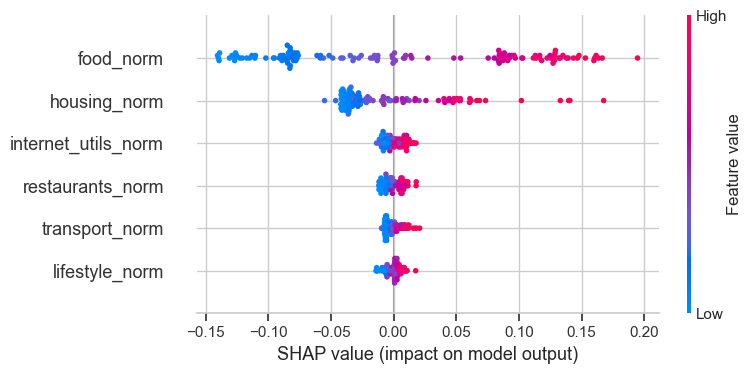

In [121]:
shap.summary_plot(shap_values, X2_train, feature_names=X2.columns)


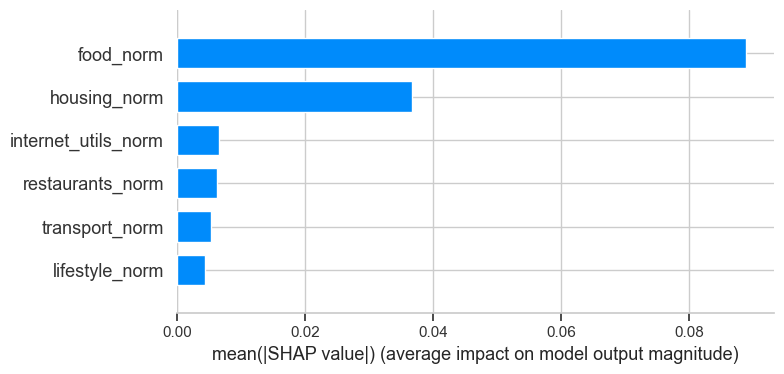

In [122]:
shap.summary_plot(shap_values, X2_train, plot_type="bar")


In [123]:
city_query = "San Diego, CA, United States"

city_name = [idx for idx in X2.index if city_query in idx][0]
sample = X2.loc[city_name]
sample_scaled = scaler2.transform([sample])


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


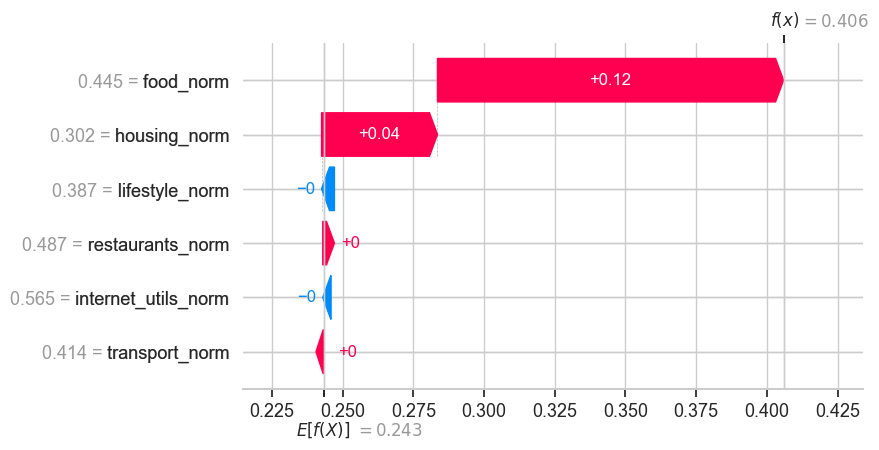

In [127]:
sample_shap = explainer.shap_values(sample_scaled)[0]
shap.waterfall_plot(shap.Explanation(values=sample_shap,
                                       base_values=explainer.expected_value,
                                       data=sample.values,
                                       feature_names=X2.columns))


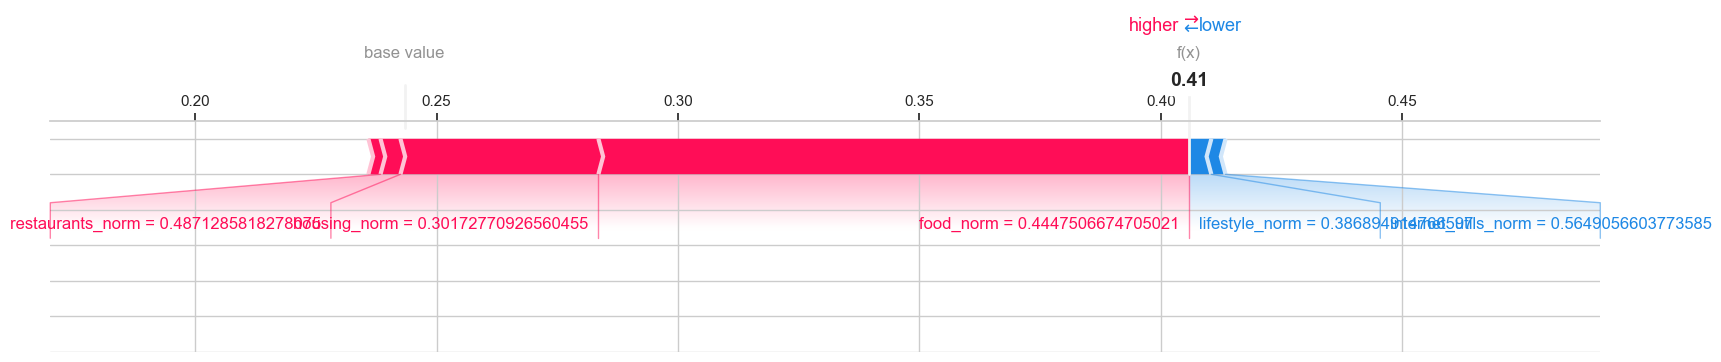

In [128]:
shap.force_plot(
    explainer.expected_value, 
    sample_shap, 
    sample,
    matplotlib=True
)


In [129]:
explanation_json = {
    "city": city_name,
    "prediction": float(rf_weighted.predict(sample_scaled)[0]),
    "base_value": float(explainer.expected_value),
    "feature_values": sample.to_dict(),
    "shap_values": {col: float(val) for col, val in zip(X2.columns, sample_shap)},
}

explanation_json


/var/folders/m9/mytk99bd4kbd75wwl7b38g440000gn/T/ipykernel_74504/738000505.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "base_value": float(explainer.expected_value),


{'city': 'San Diego, CA, United States',
 'prediction': 0.40590964016671033,
 'base_value': 0.24338417141280339,
 'feature_values': {'housing_norm': 0.30172770926560455,
  'food_norm': 0.4447506674705021,
  'restaurants_norm': 0.4871285818278075,
  'transport_norm': 0.4142204827136335,
  'internet_utils_norm': 0.5649056603773585,
  'lifestyle_norm': 0.386894914766597},
 'shap_values': {'housing_norm': 0.04099276817902457,
  'food_norm': 0.12238639716827475,
  'restaurants_norm': 0.004129307736481414,
  'transport_norm': 0.002511914750815884,
  'internet_utils_norm': -0.0029423358838841784,
  'lifestyle_norm': -0.00455258319680433}}

In [130]:
MIN_MONTHLY_COST = 1000  # CAD
MAX_MONTHLY_COST = 5000  # CAD

def score_to_monthly_cost(weighted_score):
    monthly = MIN_MONTHLY_COST + weighted_score * (MAX_MONTHLY_COST - MIN_MONTHLY_COST)
    low = monthly * 0.85
    high = monthly * 1.25
    return monthly, low, high

# Example usage
city_score = predicted_score  # from rf_weighted
monthly, low, high = score_to_monthly_cost(city_score)

print("Predicted weighted score:", city_score)
print(f"Estimated Monthly Cost: ${monthly:,.0f} CAD")
print(f"Low-Lifestyle Range: ${low:,.0f} – ${high:,.0f} CAD")


Predicted weighted score: 0.5736150674639469
Estimated Monthly Cost: $3,294 CAD
Low-Lifestyle Range: $2,800 – $4,118 CAD


In [138]:
matches = [idx for idx in X.index if "Toronto" in idx]

matches

['Toronto, Canada']

In [139]:
# ------------------------------------------------------------
# 1. Choose the city you want to predict
# ------------------------------------------------------------
city_query = "Toronto, Canada"   # <<< change this to any city


# ------------------------------------------------------------
# 2. Find matching city name in df.index
# ------------------------------------------------------------
matches = [idx for idx in X2.index if city_query in idx]

if len(matches) == 0:
    raise ValueError("City not found in dataset.")

city_name = matches[0]
print("Matched City:", city_name)


# ------------------------------------------------------------
# 3. Extract the 6 weighted features for the city
# ------------------------------------------------------------
sample_city = X2.loc[city_name]

# Scale features
sample_scaled = scaler2.transform([sample_city])


# ------------------------------------------------------------
# 4. Predict weighted COL score
# ------------------------------------------------------------
predicted_score = rf_weighted.predict(sample_scaled)[0]


# ------------------------------------------------------------
# 5. Convert score → monthly cost & range
# ------------------------------------------------------------
MIN_MONTHLY_COST = 1000  # CAD
MAX_MONTHLY_COST = 5000  # CAD

def score_to_monthly_cost(weighted_score):
    monthly = MIN_MONTHLY_COST + weighted_score * (MAX_MONTHLY_COST - MIN_MONTHLY_COST)
    low = monthly * 0.85
    high = monthly * 1.25
    return monthly, low, high

monthly, low, high = score_to_monthly_cost(predicted_score)


# ------------------------------------------------------------
# 6. Print results
# ------------------------------------------------------------
print("\n--- COST OF LIVING ESTIMATE ---")
print("City:", city_name)
print("Weighted Score:", round(predicted_score, 4))
print(f"Estimated Monthly Cost: ${monthly:,.0f} CAD")
print(f"Estimated Range: ${low:,.0f} – ${high:,.0f} CAD")

print("\nFeature Values Used:")
print(sample_city.to_dict())


Matched City: Toronto, Canada

--- COST OF LIVING ESTIMATE ---
City: Toronto, Canada
Weighted Score: 0.4212
Estimated Monthly Cost: $2,685 CAD
Estimated Range: $2,282 – $3,356 CAD

Feature Values Used:
{'housing_norm': 0.3372321603368165, 'food_norm': 0.47734906554129714, 'restaurants_norm': 0.4961286480047647, 'transport_norm': 0.590345727332029, 'internet_utils_norm': 0.40996226415094345, 'lifestyle_norm': 0.4069385504327602}


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [140]:
# Dynamic monthly ranges based on global data
city_df["monthly_proxy"] = (
    city_df["housing_avg"] * 0.4 +
    city_df["food_avg"] * 0.2 +
    city_df["restaurants_avg"] * 0.1 +
    city_df["transport_avg"] * 0.1 +
    city_df["internet_utils_avg"] * 0.1 +
    city_df["lifestyle_avg"] * 0.1
)

MIN_MONTHLY_COST = city_df["monthly_proxy"].quantile(0.05)
MAX_MONTHLY_COST = city_df["monthly_proxy"].quantile(0.95)

print("Dynamic MIN:", MIN_MONTHLY_COST)
print("Dynamic MAX:", MAX_MONTHLY_COST)

def score_to_monthly_cost(weighted_score):
    monthly = MIN_MONTHLY_COST + weighted_score * (MAX_MONTHLY_COST - MIN_MONTHLY_COST)
    low = monthly * 0.85
    high = monthly * 1.25
    return monthly, low, high


Dynamic MIN: 140.01907041666666
Dynamic MAX: 1424.9913110714285


In [141]:
# ------------------------------------------------------------
# 1. Choose the city you want to predict
# ------------------------------------------------------------
city_query = "Toronto, Canada"   # <<< change this to any city

# ------------------------------------------------------------
# 2. Find matching city name in df.index
# ------------------------------------------------------------
matches = [idx for idx in X2.index if city_query in idx]

if len(matches) == 0:
    raise ValueError("City not found in dataset.")

city_name = matches[0]
print("Matched City:", city_name)


# ------------------------------------------------------------
# 3. Extract the 6 weighted features for the city
# ------------------------------------------------------------
sample_city = X2.loc[city_name]

# Scale features
sample_scaled = scaler2.transform([sample_city])


# ------------------------------------------------------------
# 4. Predict weighted COL score
# ------------------------------------------------------------
predicted_score = rf_weighted.predict(sample_scaled)[0]


# ------------------------------------------------------------
# 5. Convert score → monthly cost & range
# ------------------------------------------------------------
MIN_MONTHLY_COST = 140.01907041666666  # CAD
MAX_MONTHLY_COST = 1424.9913110714285 # CAD

def score_to_monthly_cost(weighted_score):
    monthly = MIN_MONTHLY_COST + weighted_score * (MAX_MONTHLY_COST - MIN_MONTHLY_COST)
    low = monthly * 0.85
    high = monthly * 1.25
    return monthly, low, high

monthly, low, high = score_to_monthly_cost(predicted_score)


# ------------------------------------------------------------
# 6. Print results
# ------------------------------------------------------------
print("\n--- COST OF LIVING ESTIMATE ---")
print("City:", city_name)
print("Weighted Score:", round(predicted_score, 4))
print(f"Estimated Monthly Cost: ${monthly:,.0f} CAD")
print(f"Estimated Range: ${low:,.0f} – ${high:,.0f} CAD")

print("\nFeature Values Used:")
print(sample_city.to_dict())


Matched City: Toronto, Canada

--- COST OF LIVING ESTIMATE ---
City: Toronto, Canada
Weighted Score: 0.4212
Estimated Monthly Cost: $681 CAD
Estimated Range: $579 – $852 CAD

Feature Values Used:
{'housing_norm': 0.3372321603368165, 'food_norm': 0.47734906554129714, 'restaurants_norm': 0.4961286480047647, 'transport_norm': 0.590345727332029, 'internet_utils_norm': 0.40996226415094345, 'lifestyle_norm': 0.4069385504327602}


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
